## 1. Instalación e importación de librerías

In [ ]:
# Solo es necesario ejecutar una vez en la terminal o en una celda con '!'  
!pip install yfinance pandas numpy matplotlib plotly

In [3]:
# Importamos las librerías básicas
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


## 2. Descarga de datos con yfinance

In [20]:
# Definimos el ticker y el rango de fechas
tickers = ['NVDA', 'AAPL']
start_date = "2020-01-01"
end_date = "2022-12-31"

# Descarga de datos diarios
df = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)['Close']

# Primer vistazo
df.head()


[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,NVDA
Date,,
2020-01-02,72.538506,5.971747
2020-01-03,71.833298,5.876163
2020-01-06,72.405670,5.900806
2020-01-07,72.065147,5.972245
2020-01-08,73.224396,5.983446


## 3. Limpieza de datos

- Revisamos si hay valores faltantes

- Ajustamos tipos de dato

- Reindexamos si es necesario

In [21]:
# 3.1 Detectar valores nulos
print("Valores nulos por columna:")
print(df.isna().sum())

Valores nulos por columna:
Ticker
AAPL    0
NVDA    0
dtype: int64


Recordemos que df_clean = df.copy() crea una copia nueva y la guarda en la variable de antes del igual.

Hay2 formas de eliminar valores faltantes:
- Por filas: (para eliminar días problemáticos)
    - df.dropna(axis=0, how='ANY')

        elimina todos los valores de la fila si hay CUALQUIER valor NaN (nulo)

    - df.dropna(axis=0, how='ALL')

        elimina todos los valores de la fila si TODOS son NaN (nulo)
        
- Por columnas: (para eliminar activos problemáticos)
    - df.dropna(axis=1, how='ANY')

        elimina todos los valores de la columna si hay CUALQUIER valor NaN (nulo)

    - df.dropna(axis=1, how='ALL')

        elimina todos los valores de la columna si TODOS son NaN (nulo)

- En la función dropna hay otros 2 argumentos que nos pueden interesar:
    - inplace=, True si queremos que la limpieza se haga en el mismo dataframe
    - thresh=, para establecer el número mínimo de valores nulos que tiene que haber para que se elimine la fila o columna en cuestión

In [ ]:
# 3.2 Eliminar nulos (si los hubiese)
df_clean = df.dropna(axis=0, how='ANY')


In [ ]:
# 3.3 Indexar por fecha como DatetimeIndex
df_clean.index = pd.to_datetime(df_clean.index)

df_clean.info()

## 4. Slicing con condicionales

In [ ]:
# Extraer datos del año 2021
# TO-DO

In [ ]:
# Días con cierre por encima de los 150 USD
# TO-DO


In [ ]:
# Solo columnas de precio y volumen, para una semana concreta

## 5. Visualización

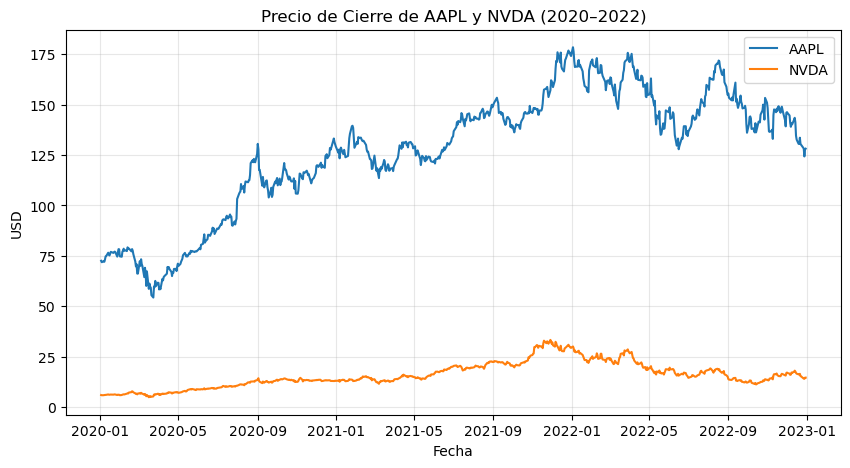

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(df_clean.index, df_clean['AAPL'], color='tab:blue', lw=1.5, label='AAPL')
plt.plot(df_clean.index, df_clean['NVDA'], color='tab:orange', lw=1.5, label='NVDA')
plt.title('Precio de Cierre de AAPL y NVDA (2020–2022)')
plt.xlabel('Fecha')
plt.ylabel('USD')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


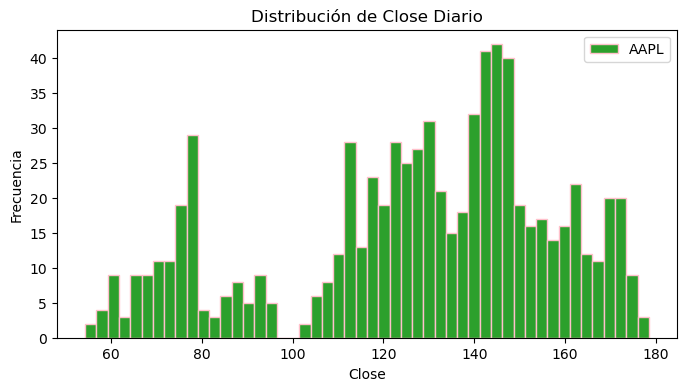

In [35]:
plt.figure(figsize=(8, 4))
plt.hist(df_clean['AAPL'], bins=50, color='tab:green', edgecolor='pink', label='AAPL')
plt.title('Distribución de Close Diario')
plt.xlabel('Close')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()